# What is EDA?
EDA stands for Exploratory Data Analysis. It’s a crucial first step in any data science or data analysis project. The main goal of EDA is to understand the structure, patterns, and relationships in the data before applying any modeling techniques.



## 🧠 Key Objectives of EDA:
- Understand the dataset – shape, types, and overall structure.

- Identify missing or inconsistent data.

- Detect outliers or anomalies.

- Understand relationships between features (correlation, dependencies).

- Generate hypotheses for further analysis or modeling.

- Choose appropriate preprocessing and modeling techniques.

## 🔧 Common EDA Steps:

- Load and preview the data
- Check for missing values
- Understand data types
- Univariate Analysis (one variable)
- Bivariate/Multivariate Analysis (multiple variables)
- Outlier Detection
- Correlation Analysis



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import os

for dirname, _, filenames in os.walk('/kaggle/input/cleaned-used-car-datasett'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv


In [2]:
# load dataset
# dataset link on kaggle: https://www.kaggle.com/datasets/amirram/cleaned-used-car-datasett
#df = pd.read_csv('clean_df3.csv')
df = pd.read_csv('/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv')
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
3,3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
4,4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,19,25,15250.0,12.368421,9.400000,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0
196,196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1
197,197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0
198,198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1


In [3]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km        int64
price                float64
city-L/100km         float64
highway-L/100km.1    float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

In [4]:
# find data type of 'peak-rpm' column
df['peak-rpm'].dtype

dtype('float64')

# how find correlation?
The .corr() function in pandas calculates the correlation coefficients between numeric columns in a DataFrame.

## 📌 Purpose:
To measure how strongly two numeric variables are related.

In [5]:
df[['bore', 'stroke','compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002034,0.566807
stroke,-0.051087,1.000000,0.186780,0.100881
compression-ratio,0.002034,0.186780,1.000000,-0.214260
horsepower,0.566807,0.100881,-0.214260,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

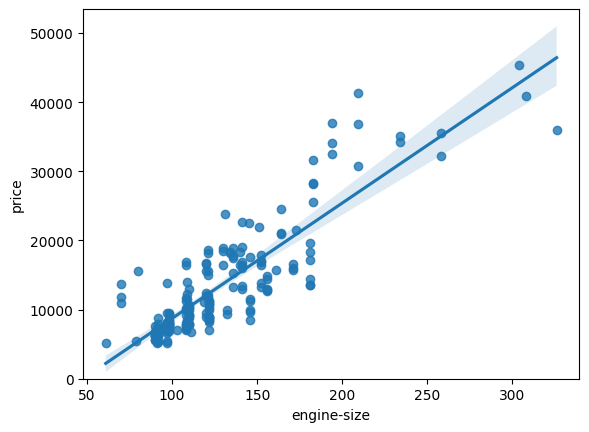

In [6]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

In [7]:
# find correlation between "engine-size" and "price"
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


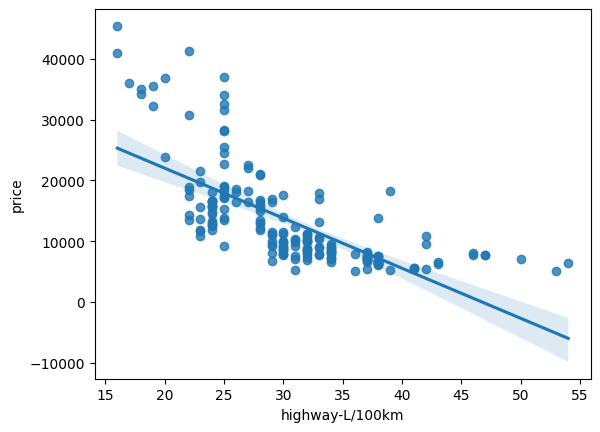

In [8]:
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.show()


In [9]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,-0.705115
price,-0.705115,1.000000


In [10]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


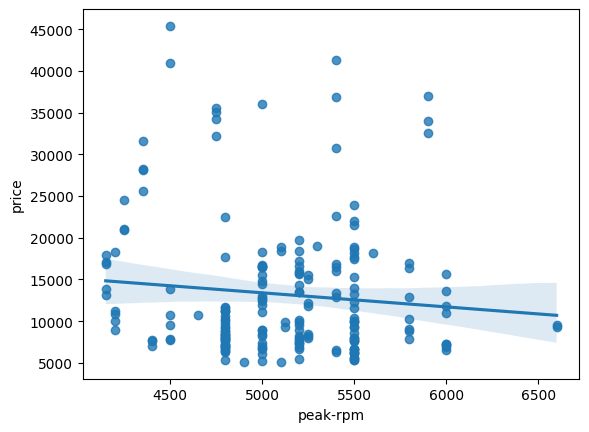

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()

In [12]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083298
price,0.083298,1.000000


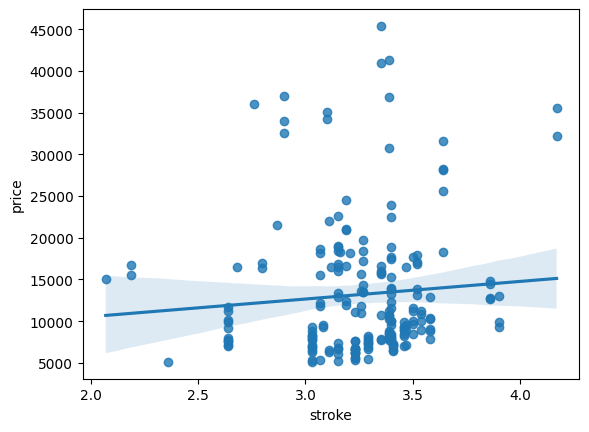

In [13]:
sns.regplot(x='stroke', y='price', data=df)
plt.show()

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

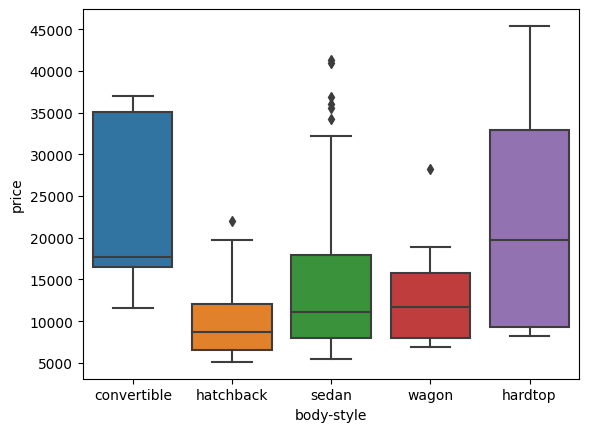

In [14]:
sns.boxplot(x='body-style', y='price', data=df)
plt.show()

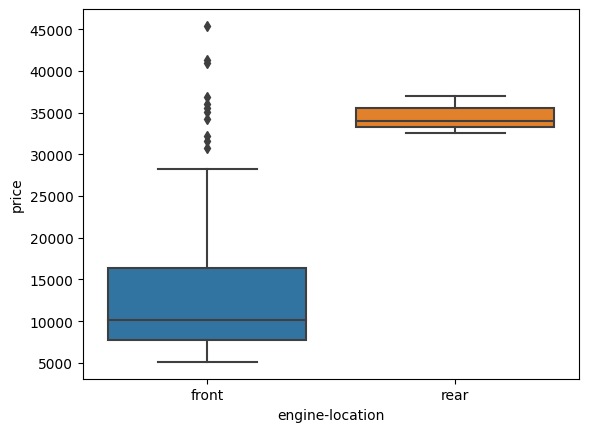

In [15]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.show()

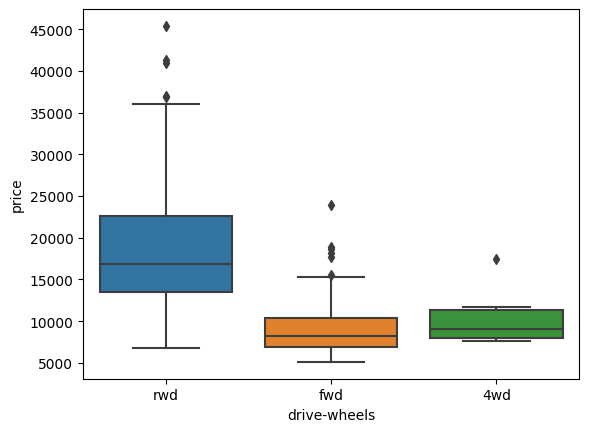

In [16]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [17]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,diesel,gas,aspiration-std,aspiration-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,...,5118.259901,25.200000,30.705000,13205.690000,9.937914,8.041663,0.100000,0.900000,0.820000,0.180000
std,57.879185,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,...,479.240743,6.432487,6.827227,7966.982558,2.539415,1.844764,0.300753,0.300753,0.385152,0.385152
min,0.000000,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,49.750000,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,99.500000,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,...,5162.995050,24.000000,30.000000,10270.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,149.250000,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,...,5500.000000,30.000000,34.000000,16500.750000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,199.000000,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [18]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


In [19]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
df['drive-wheels'].value_counts()


drive-wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [21]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [22]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [23]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


In [24]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,197
rear,3


In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [26]:
df_group_one = df[['drive-wheels','body-style','price']]

In [27]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [28]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [30]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


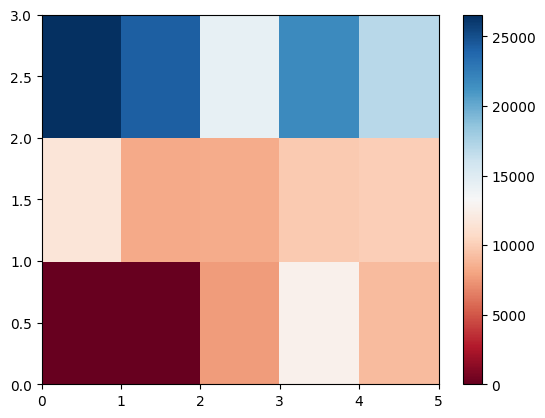

In [31]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

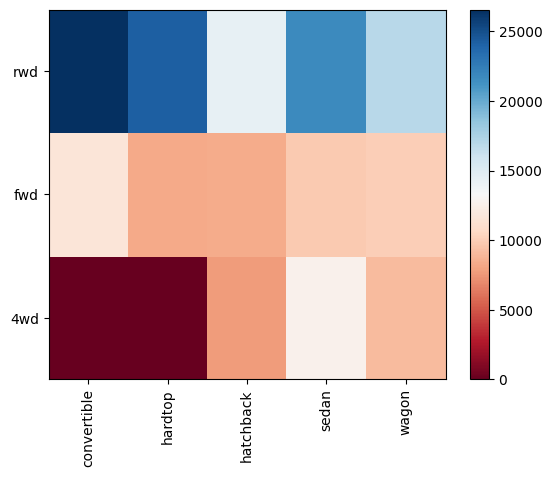

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation">Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [33]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>

In [34]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448703  with a P-value of P = 4.45701950205007e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

<h3>Horsepower vs. Price</h3>

In [35]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


The Pearson Correlation Coefficient is 0.8096565575365611  with a P-value of P =  1.0468839625926844e-47


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>

<h3>Length vs. Price</h3>

In [36]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821906  with a P-value of P =  9.960963222347823e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h3>Width vs. Price</h3>

In [37]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7527948631832608  with a P-value of P = 8.256714148308647e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-Weight vs. Price

In [38]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498463  with a P-value of P =  3.9699775360213638e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

In [39]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521143  with a P-value of P = 1.897717146655904e-63


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>

In [40]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555683  with a P-value of P =   9.207487524194362e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h3>City-mpg vs. Price</h3>

In [41]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862686  with a P-value of P =  2.7292565684790953e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [42]:
#Highway-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7051147088046403  with a P-value of P =  2.197326053158349e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
